In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

In [ ]:
im = cv.imread("/content/drive/MyDrive/VisionAgricultura/cat.jpg")
green = im[:,:,1]

array([[[ 62, 228,  97],
        [ 62, 228,  97],
        [ 62, 228,  97],
        ...,
        [ 72, 240, 104],
        [ 72, 240, 104],
        [ 72, 240, 104]],

       [[ 62, 228,  97],
        [ 62, 228,  97],
        [ 62, 228,  97],
        ...,
        [ 72, 240, 104],
        [ 72, 240, 104],
        [ 72, 240, 104]],

       [[ 62, 228,  97],
        [ 62, 228,  97],
        [ 62, 228,  97],
        ...,
        [ 72, 240, 104],
        [ 72, 240, 104],
        [ 72, 240, 104]],

       ...,

       [[ 65, 240, 107],
        [ 66, 241, 108],
        [ 66, 241, 108],
        ...,
        [ 71, 247, 110],
        [ 71, 247, 110],
        [ 71, 247, 110]],

       [[ 65, 240, 107],
        [ 66, 241, 108],
        [ 66, 241, 108],
        ...,
        [ 69, 247, 110],
        [ 69, 247, 110],
        [ 69, 247, 110]],

       [[ 65, 240, 107],
        [ 66, 241, 108],
        [ 66, 241, 108],
        ...,
        [ 70, 248, 111],
        [ 69, 247, 110],
        [ 69, 247, 110]]], dtype=uint8)
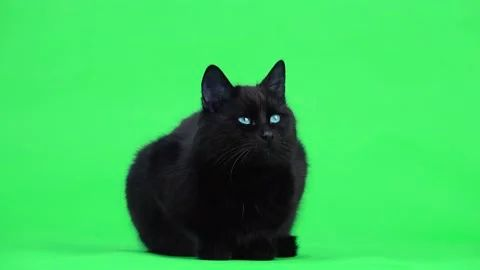

In [ ]:
im

In [ ]:
green = im[:,:,1]

array([[[200,  30,  50],
        [200,  30,  50],
        [200,  30,  50],
        ...,
        [200,  30,  50],
        [200,  30,  50],
        [200,  30,  50]],

       [[200,  30,  50],
        [200,  30,  50],
        [200,  30,  50],
        ...,
        [200,  30,  50],
        [200,  30,  50],
        [200,  30,  50]],

       [[200,  30,  50],
        [200,  30,  50],
        [200,  30,  50],
        ...,
        [200,  30,  50],
        [200,  30,  50],
        [200,  30,  50]],

       ...,

       [[200,  30,  50],
        [200,  30,  50],
        [200,  30,  50],
        ...,
        [200,  30,  50],
        [200,  30,  50],
        [200,  30,  50]],

       [[200,  30,  50],
        [200,  30,  50],
        [200,  30,  50],
        ...,
        [200,  30,  50],
        [200,  30,  50],
        [200,  30,  50]],

       [[200,  30,  50],
        [200,  30,  50],
        [200,  30,  50],
        ...,
        [200,  30,  50],
        [200,  30,  50],
        [200,  30,  50]]], dtype=uint8)
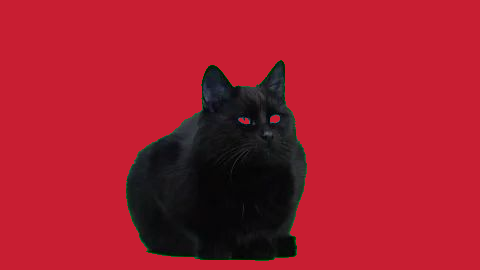

In [ ]:

im[im[:,:,1]>111]=[200,30,50]
im

In [ ]:
immario= cv.imread("/content/drive/MyDrive/VisionAgricultura/donmario.png")

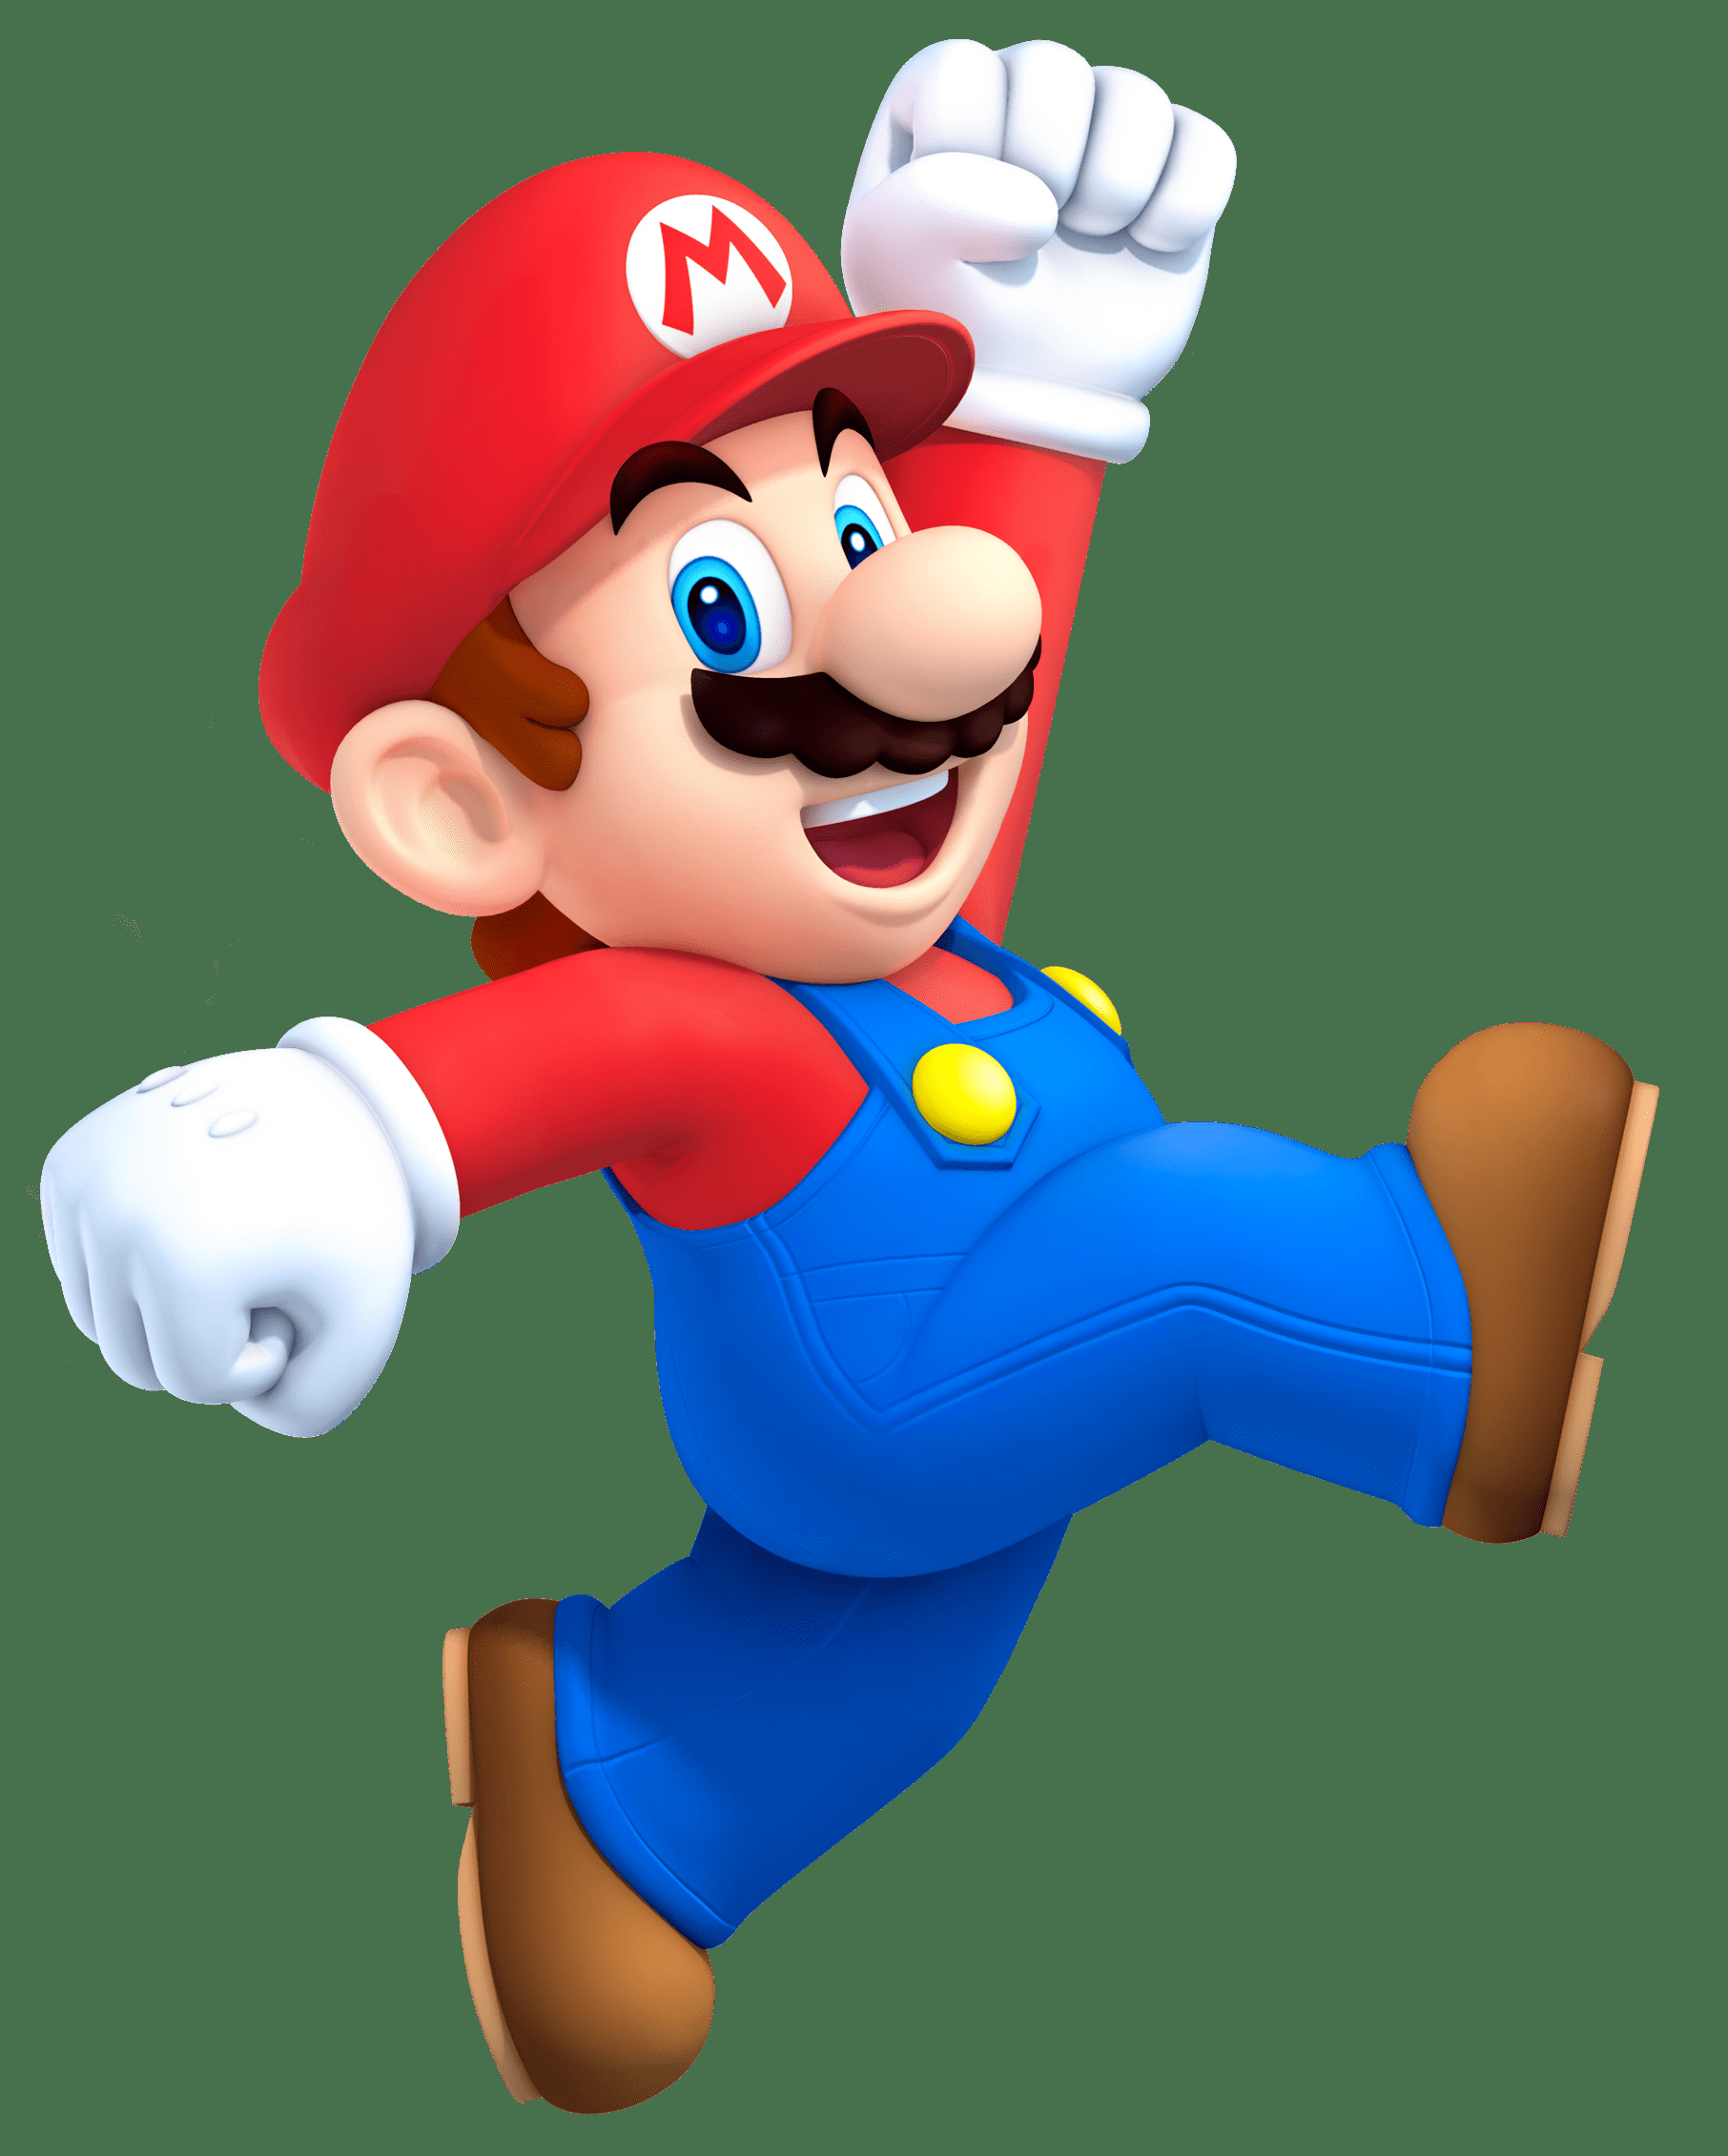

In [ ]:
cv2_imshow(immario)

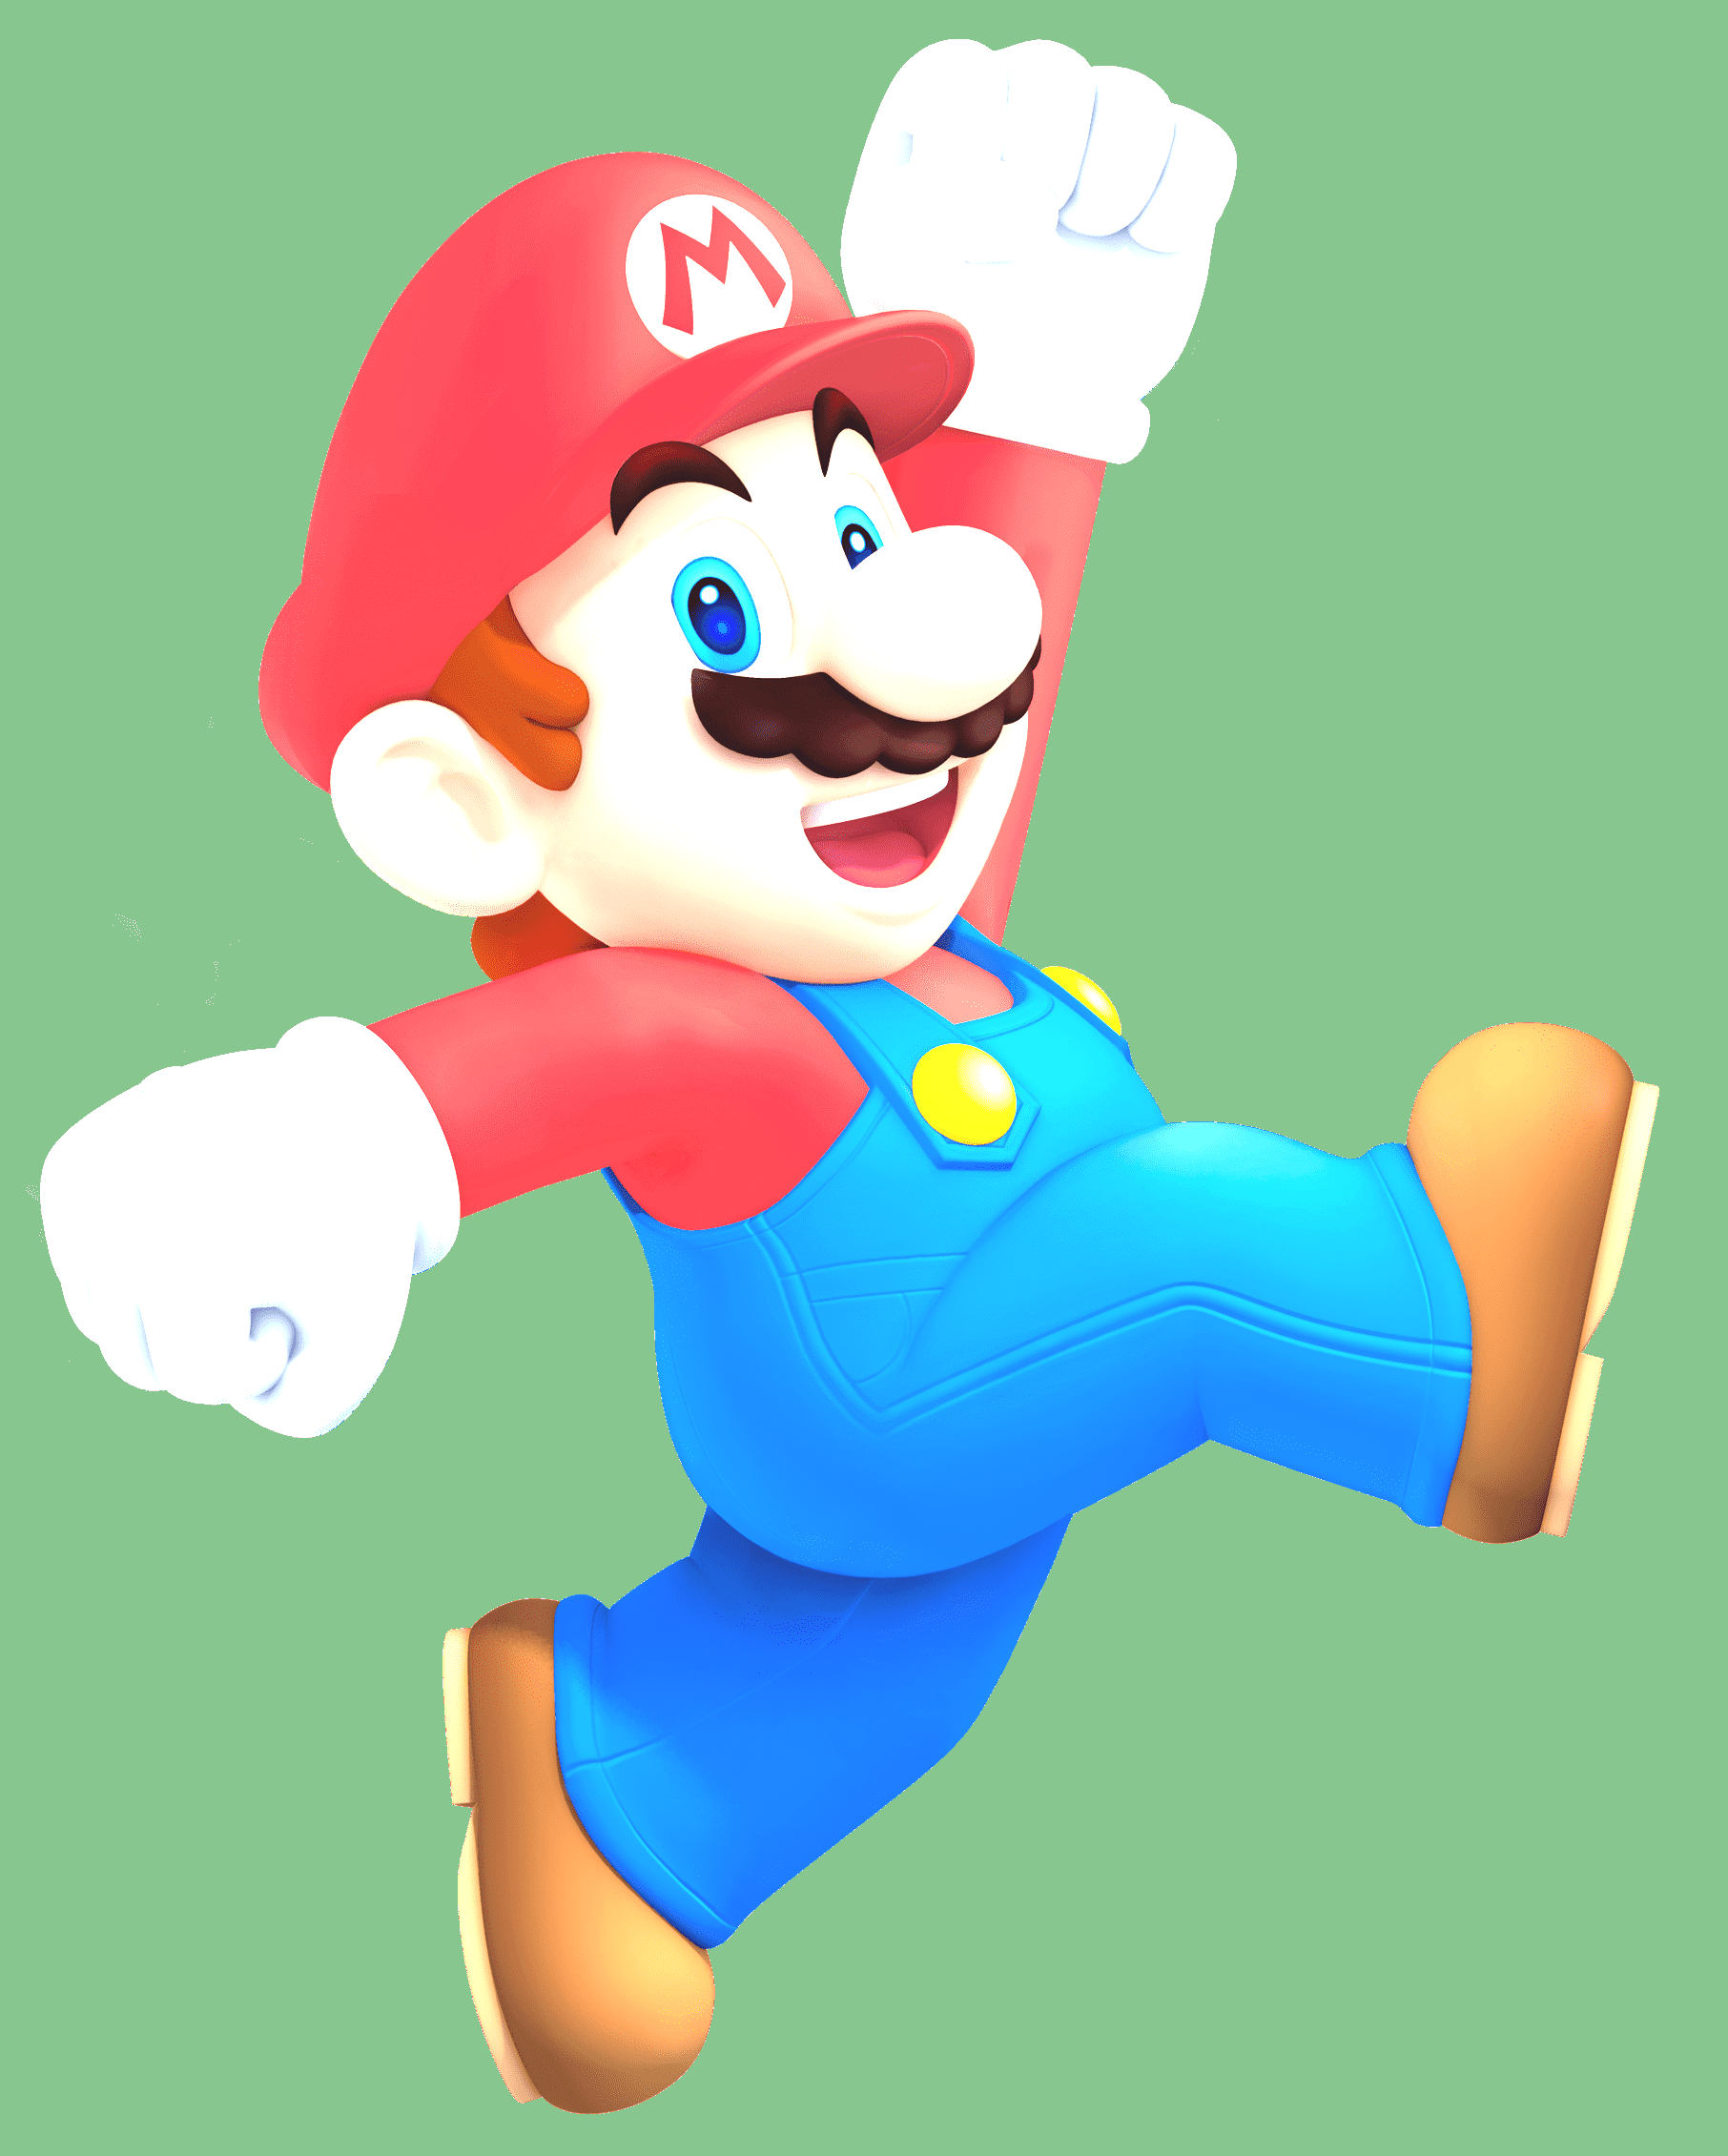

In [ ]:
alpha = 1.5  # Factor de contraste (1.0 significa sin cambio)
beta = 30    # Factor de brillo

imagen_ajustada = cv.convertScaleAbs(immario, alpha=alpha, beta=beta)
cv2_imshow(imagen_ajustada)

In [ ]:
def contraste_y_brillo(img):
    # Incrementar o decrementar el brillo (por ejemplo, aumentar en 50 unidades)
    alfa = 1.5
    beta = 0.2
    modified = np.clip(img.astype(np.float32) * alfa, 0, 255).astype(np.uint8)
    modified = np.clip(modified.astype(np.int16) + beta, 0, 255).astype(np.uint8)
    #contrasted_image = np.clip(image.astype(np.float32) * contrast_scale, 0, 255).astype(np.uint8)
    #brightened_image = np.clip(image.astype(np.int16) + brightness_offset, 0, 255).astype(np.uint8)

    cv.imshow('Imagen Original', img)
    cv.imshow('Imagen con Brillo/Contraste Modificado', modified)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [ ]:
def disolucion():
    # Cargar las dos imágenes que quieres disolver
    imagen_0 = cv.imread('CiudadD.png')
    imagen_1 = cv.imread('CiudadN.png')

    imagen_1 = cv.resize(imagen_1, (imagen_0.shape[1], imagen_0.shape[0]))

    # Definir el parámetro de disolución (de 0 a 1)
    a = 0.5  # Por ejemplo, una disolución al 50%

    # Aplicar la fórmula de disolución
    disolucion = cv.addWeighted(imagen_0, 1-a, imagen_1, a, 0)

    # Mostrar la imagen resultante de la disolución
    cv.imshow('Imagen de Disolución', disolucion)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [ ]:
def Image_matting(img):
    fondo = cv.imread('nube.jpg')
    img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

    lower_green = np.array([50, 60, 95])
    upper_green = np.array([90, 255, 255])

    # Crear una máscara para el color verde
    mask = cv.inRange(img_hsv, lower_green, upper_green)

    # Invertir la máscara
    #mask = cv.bitwise_not(mask)
    gato_sin_fondo = cv.bitwise_and(img, img, mask=cv.bitwise_not(mask))

    fondo_redimensionado = cv.resize(fondo, (img.shape[1], img.shape[0]))

    nueva_imagen = cv.bitwise_and(fondo_redimensionado, fondo_redimensionado, mask=mask) + gato_sin_fondo

    # Aplicar la máscara para obtener el fondo blanco
    cv.imshow('Imagen de gato', nueva_imagen)
    cv.waitKey(0)
    cv.destroyAllWindows()